In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, decomposition, model_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix


# Preprocessing 

##### Data exploration : getting info from the data, dropping unusefull features

In [3]:
# Data reading
data = pd.read_csv('Data/Water Quality Prediction.csv')

# Data info
print("Informations sur les données :")
data.info()
print("\nNombre de valeurs uniques par colonne :")
print(data.nunique())

# Unusefull feature dropping
features_to_drop = ['Index','Month','Day','Time of Day']
data.drop(columns=features_to_drop, inplace=True)

data.head()



Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            10

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,0
1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,0
2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,0
3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,237.028468,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,0
4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,0


#### NaN values location visualization 

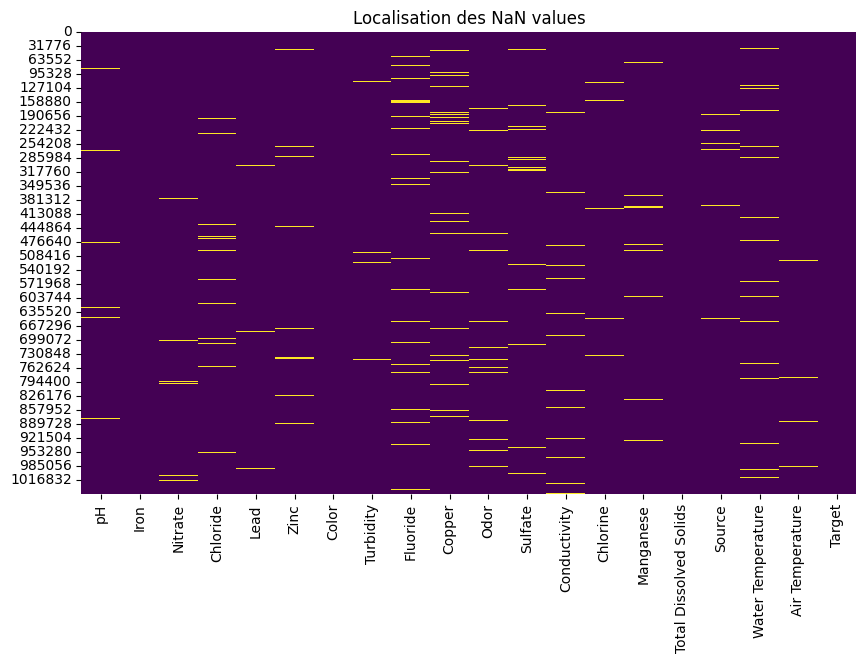

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False, cmap="viridis")
plt.title("Localisation des NaN values")
plt.show()

#### Rate of NaN values before cleaning 

In [5]:
# Calcul du pourcentage de NaN par colonne
nan_percentage = data.isna().mean() * 100
print("\nPourcentage de valeurs manquantes par colonne :")
print(nan_percentage)

# Gestion des valeurs manquantes
# Remplissage des NaN pour les données numériques avec la moyenne
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())




Pourcentage de valeurs manquantes par colonne :
pH                        1.929380
Iron                      0.666714
Nitrate                   1.782896
Chloride                  2.940562
Lead                      0.446701
Zinc                      2.639296
Color                     0.093556
Turbidity                 0.829125
Fluoride                  3.167918
Copper                    3.326610
Odor                      2.988055
Sulfate                   3.292564
Conductivity              2.746871
Chlorine                  0.969125
Manganese                 1.844313
Total Dissolved Solids    0.028420
Source                    1.481534
Water Temperature         2.831271
Air Temperature           0.505734
Target                    0.000000
dtype: float64


In [6]:
# Suppression des lignes avec des NaN dans les colonnes catégoriques
cat_cols = data.select_dtypes(include=['object']).columns
data.dropna(subset=cat_cols, inplace=True)
data.reset_index(drop=True, inplace=True)

# Vérification des NaN après traitement
print("\nValeurs manquantes après traitement :")
print(data.isnull().sum())


Valeurs manquantes après traitement :
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Target                    0
dtype: int64


#### Cleaning of quantitative features NaN values and decomposing categorical features

In [ ]:
data_num = data.select_dtypes(include=['float64', 'int64']).copy()
data_num = data_num.fillna(data_num.mean())


####### Qualitative data 
df_cat = data.select_dtypes(include=['object']).copy()
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot_df = pd.DataFrame(df_cat_1hot, columns=cat_encoder.get_feature_names_out(df_cat.columns))

###### Quantitative and qualitative data cleaned concatenation 

df_cat_1hot_df.index = data_num.index  # Aligne les index
df = pd.concat([data_num, df_cat_1hot_df], axis=1)


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Color_Near Colorless,Color_Yellow,Source_Aquifer,Source_Ground,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well
0,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,0.019007,0.622874,0.437835,1.686049,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,0.319956,0.423423,0.431588,3.414619,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,0.166319,0.208454,0.239451,1.772712,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,0.004867,0.222912,0.616574,0.795310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7.449720,0.000006,1.702584,162.828458,6.100000e-23,3.742464,0.504791,0.054562,0.851326,1.270483,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Data scaling using MixMax method

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
data.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
pH,0.000000,0.497668,0.077494,1.000000
Iron,0.000000,0.007235,0.028060,1.000000
Nitrate,0.000000,0.079581,0.042634,1.000000
Chloride,0.000000,0.108814,0.046231,1.000000
Lead,0.000000,0.000367,0.008599,1.000000
Zinc,0.000000,0.053885,0.052350,1.000000
Turbidity,0.000000,0.025051,0.044421,1.000000
Fluoride,0.000000,0.073211,0.060661,1.000000
Copper,0.000000,0.043379,0.048905,1.000000
Odor,0.000000,0.426462,0.250640,1.000000


#### Correlation matrix visualisation 

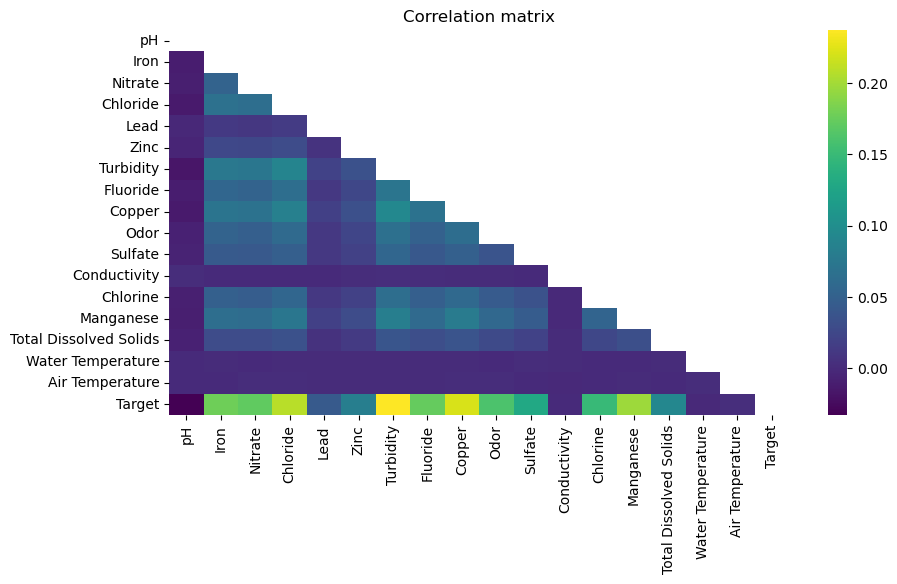

In [8]:
# Vérification des corrélations entre les features (que pour les quanti, pas de sens pour les quali)
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(data_num.corr(numeric_only=True), dtype=bool))
sns.heatmap(
    data_num.corr(numeric_only=True),
    annot=False, cmap="viridis", mask=mask, cbar=True
)
plt.title("Correlation matrix")
plt.show()

In [9]:
### C'est juste pour nous pour verifier mais ca dégage
print("Après fill :",data.isnull().sum())  

Après fill : pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Target                    0
Color_Colorless           0
Color_Faint Yellow        0
Color_Light Yellow        0
Color_Near Colorless      0
Color_Yellow              0
Source_Aquifer            0
Source_Ground             0
Source_Lake               0
Source_Reservoir          0
Source_River              0
Source_Spring             0
Source_Stream             0
Source_Well               0
dtype: int64


#### Rate of potable and non potable water in our dataset

Target
0.0    795079
1.0    236992
Name: count, dtype: int64


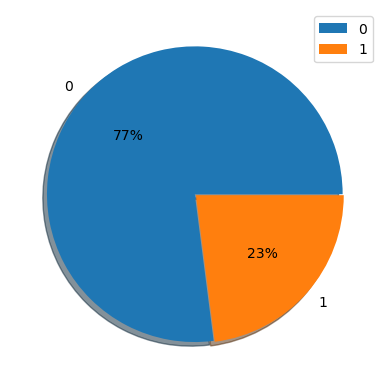

In [10]:
tar = data['Target'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

# Training 

### Split the data

In [11]:
# Séparation des données
x = data.drop('Target', axis=1)  # Toutes les colonnes sauf 'potability'
y = data['Target']               # Colonne cible

# Séparation en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Train different models

##### Logistic regression

Comparaison des Modèles :
                        Accuracy       AUC  F1 Score
Logistique regression  0.809239  0.853129  0.479883


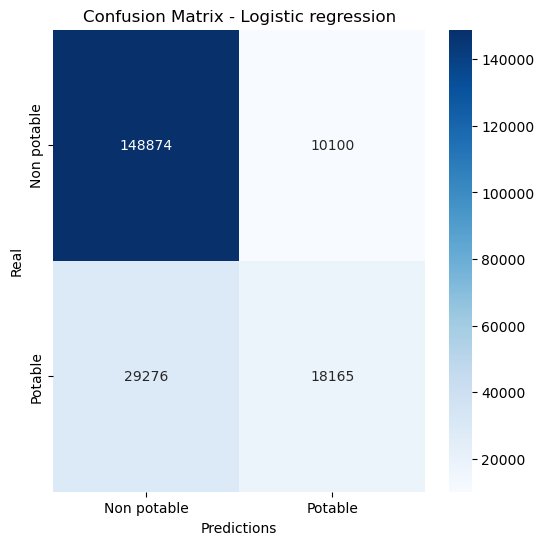

In [13]:
model = LogisticRegression()

results = {}

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_probs = model.predict_proba(x_test)[:, 1]  # Probabilités pour la classe 1 (potable)

# Calcul des métriques
accuracy = metrics.accuracy_score(y_test, y_pred)
auc_score = auc(*roc_curve(y_test, y_probs)[:2])  # AUC de la courbe ROC
f1 = metrics.f1_score(y_test, y_pred)

results["Logistique regression"] = {
        'Accuracy': accuracy,
        'AUC': auc_score,
        'F1 Score': f1
    }

results_df = pd.DataFrame(results).T
print("Comparaison des Modèles :\n", results_df)

best_model_name = results_df['AUC'].idxmax()  # Choisir le modèle avec la meilleure AUC


# Matrice de confusion
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Non potable', 'Potable'], yticklabels=['Non potable', 'Potable'])
plt.title(f"Confusion Matrix - Logistic regression")
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.show()


In [ ]:
############## Modélisation et sélection du meilleur modèle #############

# Liste des modèles à tester
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionnaire pour stocker les résultats de performance
results = {}

# Entraînement et évaluation des modèles
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_probs = model.predict_proba(x_test)[:, 1]  # Probabilités pour la classe 1 (potable)

    # Calcul des métriques
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc_score = auc(*roc_curve(y_test, y_probs)[:2])  # AUC de la courbe ROC
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Stockage des résultats
    results[model_name] = {
        'Accuracy': accuracy,
        'AUC': auc_score,
        'F1 Score': f1
    }

# Affichage des résultats pour comparer les modèles
results_df = pd.DataFrame(results).T
print("Comparaison des Modèles :\n", results_df)

# Sélection du meilleur modèle basé sur l'AUC (ou une autre métrique comme Accuracy ou F1 Score)
best_model_name = results_df['AUC'].idxmax()  # Choisir le modèle avec la meilleure AUC
best_model = models[best_model_name]

print(f"\nLe meilleur modèle est : {best_model_name}")

### 21 mins

Comparaison des Modèles :
                      Accuracy       AUC  F1 Score
Logistic Regression  0.809040  0.853326  0.478783
Decision Tree        0.837274  0.768123  0.643909
Random Forest        0.875808  0.925270  0.780674
K-Nearest Neighbors  0.811283  0.812322  0.494563

Le meilleur modèle est : Random Forest


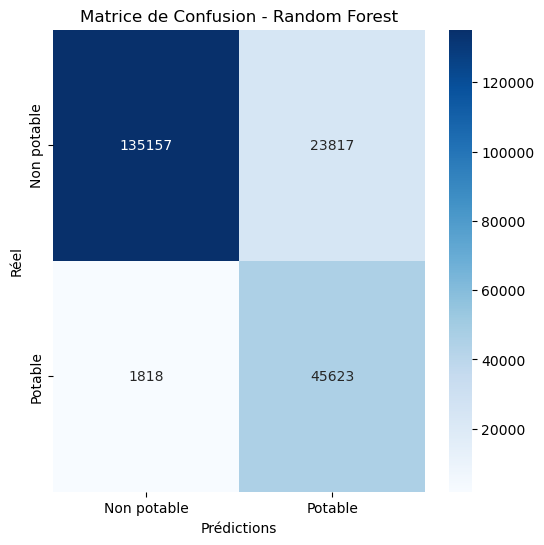


Classification Report pour Random Forest :
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91    158974
         1.0       0.66      0.96      0.78     47441

    accuracy                           0.88    206415
   macro avg       0.82      0.91      0.85    206415
weighted avg       0.91      0.88      0.88    206415



In [20]:
############# Évaluation du meilleur modèle #############

# Prédictions et évaluation du meilleur modèle
y_pred_best = best_model.predict(X_test)
y_probs_best = best_model.predict_proba(X_test)[:, 1]

# Matrice de confusion
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Non potable', 'Potable'], yticklabels=['Non potable', 'Potable'])
plt.title(f"Matrice de Confusion - {best_model_name}")
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

# Classification Report
print(f"\nClassification Report pour {best_model_name} :")
print(classification_report(y_test, y_pred_best))


## PCA 

In [ ]:
model = RandomForestClassifier()
N_COMP = 15

pca = decomposition.PCA(n_components=N_COMP)
xp_train = pca.fit_transform(x_train)  
xp_test = pca.transform(x_test)


results = {}

model.fit(xp_train, y_train)
yp_pred = model.predict(xp_test)
yp_probs = model.predict_proba(xp_test)[:, 1]  # Probabilités pour la classe 1 (potable)


paccuracy = metrics.accuracy_score(y_test, yp_pred)
pauc_score = auc(*roc_curve(y_test, yp_probs)[:2])  # AUC de la courbe ROC
pf1 = metrics.f1_score(y_test, yp_pred)

presults = {}


presults["Random forest"] = {
        'Accuracy': paccuracy,
        'AUC': pauc_score,
        'F1 Score': pf1
    }

presults_df = pd.DataFrame(presults).T
print("Comparaison des Modèles :\n", presults_df)

print("C'était mieux avant")  

## 15 mins

Comparaison des Modèles :
                Accuracy       AUC  F1 Score
Random forest  0.823424  0.855372   0.56624
C'était mieux avant


#### Cross validation

In [ ]:
SCORINGS = "f1_weighted"

xp = np.vstack([x_train, x_test])
yp = np.hstack([y_train, y_test])

scores = model_selection.cross_val_score(
    model, xp, yp, cv=10, scoring=SCORINGS
)
with np.printoptions(precision=2):
    print(scores)

print(f"\n{SCORINGS}: {scores.mean():.3f}, with std dev: {scores.std():.3f}\n")

### 247 mins

[0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88]

f1_weighted: 0.883, with std dev: 0.001



In [ ]:
#Résultat de la cross val (247mins)
#### Cross val avec fill by mean, randomforest, cv = 10 , scrorings = 'f1_weighted' 

# [0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88]
#f1_weighted: 0.883, with std dev: 0.001

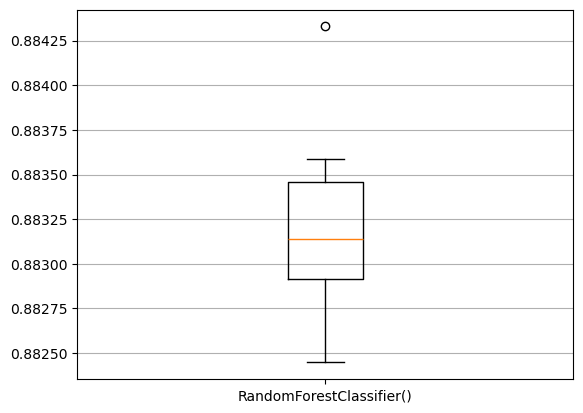

In [40]:
plt.boxplot(scores)
plt.xticks([1], [str(model)])
plt.grid(axis="y")
plt.show()